In [1]:
import pandas as pd
import sys
import json
import LLDA.model.labeled_lda as llda
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# sys.path.append('../')

In [2]:
with open('FRIS_data.json') as f:
    data = json.load(f)

clean_data = {}
for pro_id in data.keys():
    if data[pro_id]['publications'] and data[pro_id]['disciplines']:
        clean_data[pro_id] = data[pro_id]
print(len(clean_data))

pro_id_list = list(clean_data.keys())
for pro_id in pro_id_list:
    pubs = {}
    pro_dis_list = []
    for pub_id in clean_data[pro_id]['publications'].keys():
        if clean_data[pro_id]['publications'][pub_id]['disciplines'] and clean_data[pro_id]['publications'][pub_id]['authors']:
            pro_dis_list.extend(clean_data[pro_id]['publications'][pub_id]['disciplines'])
            pubs[pub_id] = clean_data[pro_id]['publications'][pub_id]
    
    if pubs:
        clean_data[pro_id]['publications'] = pubs
        clean_data[pro_id]['disciplines'] = list(set(pro_dis_list))
    else:
        del clean_data[pro_id]

print(len(clean_data))

444
147


In [3]:
split = 0.8
train_data = {k: clean_data[k] for k in list(clean_data.keys())[:int(split*len(clean_data))]}
test_data = {k: clean_data[k] for k in list(clean_data.keys())[int(split*len(clean_data)):]}
print(len(train_data), len(test_data))

train_project_data = {}
train_pub_data = []
for pro_id in train_data.keys():
    train_project_data[pro_id] = (train_data[pro_id]['abstract'], train_data[pro_id]['disciplines'])
    for pub_id in train_data[pro_id]['publications'].keys():
        train_pub_data.append((pub_id, train_data[pro_id]['publications'][pub_id]['abstract'], train_data[pro_id]['publications'][pub_id]['disciplines']))

test_project_data = {}
test_pub_data = []
for pro_id in test_data.keys():
    test_project_data[pro_id] = (test_data[pro_id]['abstract'], test_data[pro_id]['disciplines'])
    for pub_id in test_data[pro_id]['publications'].keys():
        test_pub_data.append((pub_id, test_data[pro_id]['publications'][pub_id]['abstract'], test_data[pro_id]['publications'][pub_id]['disciplines']))

print(len(train_project_data), len(test_project_data), len(train_pub_data), len(test_pub_data))

117 30
117 30 377 150


In [4]:
print(train_project_data[list(train_project_data.keys())[0]])
print(train_pub_data[0][1])

('Viruses have evolved to hijack key cellular components of their natural host. The VirEOS project will analyze how medically relevant viruses such as human respiratory syncytial, hepatitis E, yellow fever, Zika or Kaposi sarcoma-associated herpes virus, interfere with RNA sensing and RNA homeostasis in their host cells. The impact of identified factors on the pathogenicity and on the immune responses will then be analyzed in vivo, using infectious models. Understanding how viruses manipulate cellular RNA should not only provide new targets to the development of antiviral drugs but also help to identify important cellular hubs in RNA physiology.', ['0306', '0104', '0302', '0301', '0106'])
Objective Chronic HBV/HDV infections are a major cause of liver cancer. Current treatments can only rarely eliminate HBV and HDV. Our previously developed preS1-HDAg immunotherapy could induce neutralising antibodies to HBV in vivo and raise HBV/HDV-specific T-cells. Here, we further investigate if a 

In [5]:
# # load from disk
# llda_model_project = llda.LldaModel()
# llda_model_project.load_model_from_dir("LLDA/data_models/pro_abstracts_disciplines", load_derivative_properties=False)
# print("llda_model_project", llda_model_project)
# # print("Top-5 terms of topic 'virus': ", llda_model_project.top_terms_of_topic("virus", 5, False))
# print("Doc-Topic Matrix: \n", llda_model_project.theta)
# print("Topic-Term Matrix: \n", llda_model_project.beta)

In [6]:
llda_model_project = llda.LldaModel(labeled_documents=train_project_data.values())
print(llda_model_project)
llda_model_pub = llda.LldaModel(labeled_documents=[(pub[1], pub[2]) for pub in train_pub_data])
print(llda_model_pub)


Labeled-LDA Model:
	K = 33
	M = 117
	T = 5818
	WN = 20882
	LN = 404
	alpha = 1.5151515151515151
	eta = 0.001
	perplexity = 662.7494649999978
	

Labeled-LDA Model:
	K = 33
	M = 377
	T = 14189
	WN = 72456
	LN = 842
	alpha = 1.5151515151515151
	eta = 0.001
	perplexity = 1078.8996338531435
	


In [7]:
# training
llda_model_project.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

after iteration: 0, perplexity: 662.7494649999978
gibbs sample count:  20882
after iteration: 1, perplexity: 573.0710685913195
gibbs sample count:  20882
after iteration: 2, perplexity: 562.9260539875347
gibbs sample count:  20882
after iteration: 3, perplexity: 561.5169130859562
gibbs sample count:  20882
after iteration: 4, perplexity: 562.9873353144199
gibbs sample count:  20882
after iteration: 5, perplexity: 557.8100860073325
gibbs sample count:  20882
after iteration: 6, perplexity: 560.1601747770987
gibbs sample count:  20882
after iteration: 7, perplexity: 559.9531900269726
gibbs sample count:  20882
after iteration: 8, perplexity: 559.8349144104808
gibbs sample count:  20882
after iteration: 9, perplexity: 560.8328830731233
gibbs sample count:  20882


In [8]:
llda_model_pub.training(iteration=10, log=True)

after iteration: 0, perplexity: 1078.8996338531435
gibbs sample count:  72456
after iteration: 1, perplexity: 972.0988145482485
gibbs sample count:  72456
after iteration: 2, perplexity: 955.7154595787201
gibbs sample count:  72456
after iteration: 3, perplexity: 949.3066285756764
gibbs sample count:  72456
after iteration: 4, perplexity: 947.7493817301054
gibbs sample count:  72456
after iteration: 5, perplexity: 945.7127743467314
gibbs sample count:  72456
after iteration: 6, perplexity: 943.3591799358829
gibbs sample count:  72456
after iteration: 7, perplexity: 944.675849732087
gibbs sample count:  72456
after iteration: 8, perplexity: 943.2547349719456
gibbs sample count:  72456
after iteration: 9, perplexity: 941.4482259083645
gibbs sample count:  72456


In [9]:
# # update
# print("before updating: ", llda_model)
# update_labeled_documents = [("new example test example test example test example test", ["example", "test"])]
# llda_model.update(labeled_documents=update_labeled_documents)
# print("after updating: ", llda_model)

# # train again
# # llda_model.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

In [10]:
# inference
# note: the result topics may be different for difference training, because gibbs sampling is a random algorithm
document = list(test_project_data.values())[0][0]
print(document)

topics = llda_model_project.inference(document=document, iteration=30, times=10)
# print sorted topics
sorted(topics, key=lambda x: x[0])

The core objective of the research program is to bring advanced analysis and control methods for uncertain and parameter−varying linear systems closer to engineering practice, and to mechatronic applications, such as wafer stages, pick−and−place robots, etc., in particular. To this end, the project combines (i) theoretical advances to alleviate the methods’ inherent trade−off in conservatism and computational effort; (ii) methodological developments to solve the controller design and trajectory optimization problems efficiently; and (iii) experimental implementations. The theoretical and methodological contributions are rooted in convex and robust optimization, which have a whole range of engineering applications. 


[('0101', 0.022626262626262626),
 ('0102', 0.016792929292929294),
 ('0103', 0.023459595959595965),
 ('0104', 0.035959595959595955),
 ('0106', 0.036792929292929294),
 ('0201', 0.012626262626262628),
 ('0202', 0.026792929292929295),
 ('0203', 0.013459595959595961),
 ('0204', 0.03345959595959597),
 ('0205', 0.013459595959595961),
 ('0206', 0.014292929292929295),
 ('0207', 0.012626262626262628),
 ('0208', 0.03012626262626263),
 ('0299', 0.02512626262626263),
 ('0301', 0.03762626262626263),
 ('0302', 0.019292929292929296),
 ('0303', 0.0417929292929293),
 ('0304', 0.020959595959595963),
 ('0305', 0.015126262626262628),
 ('0306', 0.031792929292929296),
 ('0401', 0.015126262626262628),
 ('0402', 0.015126262626262628),
 ('0501', 0.025959595959595964),
 ('0502', 0.012626262626262628),
 ('0503', 0.031792929292929296),
 ('0504', 0.013459595959595961),
 ('0505', 0.022626262626262626),
 ('0506', 0.016792929292929294),
 ('0507', 0.014292929292929295),
 ('0508', 0.015959595959595962),
 ('0602', 0.0134

In [11]:
documents = list(test_project_data.values())
project_matrix_test = np.zeros((len(documents), llda_model_project.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_project.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        project_matrix_test[i, j] = prob

project_matrix_test

array([[0.02179293, 0.02012626, 0.0134596 , 0.04012626, 0.0309596 ,
        0.01262626, 0.0259596 , 0.01262626, 0.03012626, 0.01262626,
        0.01429293, 0.0134596 , 0.02679293, 0.0209596 , 0.0434596 ,
        0.02429293, 0.01762626, 0.01929293, 0.01762626, 0.04512626,
        0.01429293, 0.01512626, 0.03012626, 0.0134596 , 0.03762626,
        0.0134596 , 0.02012626, 0.0209596 , 0.01429293, 0.01762626,
        0.01429293, 0.01929293, 0.3059596 ],
       [0.01594896, 0.01805423, 0.02752791, 0.0338437 , 0.02437002,
        0.01700159, 0.02226475, 0.02858054, 0.02015949, 0.01805423,
        0.01700159, 0.01700159, 0.02542265, 0.01700159, 0.06331738,
        0.04015949, 0.01700159, 0.01594896, 0.02015949, 0.10121212,
        0.02752791, 0.01594896, 0.01594896, 0.01700159, 0.02015949,
        0.01910686, 0.02542265, 0.02963317, 0.01910686, 0.01594896,
        0.01700159, 0.01910686, 0.19805423],
       [0.0076229 , 0.0076229 , 0.02984512, 0.01428956, 0.06895623,
        0.00673401, 0.0156

In [12]:
documents = [(pub[1], pub[2]) for pub in test_pub_data]
pub_matrix_test = np.zeros((len(documents), llda_model_pub.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_pub.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        pub_matrix_test[i, j] = prob

pub_matrix_test

array([[0.02307595, 0.02433118, 0.06951946, ..., 0.00717637, 0.00717637,
        0.39378724],
       [0.04538758, 0.01444835, 0.02991796, ..., 0.00947598, 0.008371  ,
        0.4205257 ],
       [0.00726279, 0.00660705, 0.01480378, ..., 0.00562345, 0.00923   ,
        0.27086935],
       ...,
       [0.02180087, 0.03665801, 0.03494372, ..., 0.01151515, 0.01037229,
        0.27380087],
       [0.0186206 , 0.00866584, 0.0222405 , ..., 0.00957082, 0.00776087,
        0.4502948 ],
       [0.02623495, 0.0207555 , 0.03308427, ..., 0.02486509, 0.02349523,
        0.10157742]])

In [13]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_project.perplexity(documents=map(lambda x: x[0], test_project_data),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_project.perplexity())

perplexity on test data: 6600.685643397548
perplexity on training data: 556.986249221078


In [14]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_pub.perplexity(documents=map(lambda x: x, [pub[1] for pub in test_pub_data]),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_pub.perplexity())

perplexity on test data: 1152.7673930732806
perplexity on training data: 942.3193479103477


In [15]:
# save to disk
save_model_dir = "LLDA/data_models/topic_pro_disciplines"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_project.save_model_to_dir(save_model_dir)
# save to disk
save_model_dir = "LLDA/data_models/topic_pub_disciplines"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_pub.save_model_to_dir(save_model_dir)

In [16]:
project_matrix = np.concatenate((llda_model_project.theta, project_matrix_test))
pub_matrix = np.concatenate((llda_model_pub.theta, pub_matrix_test))

distance_matrix = np.zeros((len(project_matrix), len(pub_matrix)))

for i in range(len(project_matrix)):
    for j in range(len(pub_matrix)):
        distance_matrix[i, j] = 1 - cosine_similarity([project_matrix[i]], [pub_matrix[j]])[0][0]

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = []
for pro_id in clean_data.keys():
    for pub_id in clean_data[pro_id]['publications'].keys():
        pub_data.append((pub_id, clean_data[pro_id]['publications'][pub_id]))

data_matrix = [[0.] * len(pub_data) for _ in range(len(clean_data))]
for i, pro_id in enumerate(clean_data.keys()):
    for j, pub_id in enumerate([pub[0] for pub in pub_data]):
        belongs = 1 if pub_id in clean_data[pro_id]['publications'].keys() else 0
        date = 1 if clean_data[pro_id]['start_date'] <= pub_data[j][1]['date'] else 0
        org = len(set(clean_data[pro_id]['organizations']) & set(pub_data[j][1]['organizations'])) / len(set(pub_data[j][1]['organizations']))
        auth = len(set(clean_data[pro_id]['authors']) & set(pub_data[j][1]['authors'])) / len(set(pub_data[j][1]['organizations']))
        distance = distance_matrix[i, j]
        data_matrix[i][j] = [belongs, date, org, auth, distance]

df = pd.DataFrame(data_matrix, index=clean_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data.csv')
df.head()

,55975b31-3cc2-4534-a097-85b1eab6cd53,bbaf834d-f8e1-4187-84b4-a35484625c09,50ad741e-6c36-4fbb-9b48-0fa901e9f63b,383f820f-0e0c-4aee-bfb4-6ebd5f6c2b63,ca3fcf40-66cf-44cd-a51e-3cff9e189cf5,d0399103-8325-4b32-9476-3d3729793829,ae73aff3-91db-470d-bc96-ea6d2e9fe137,d640f97c-94eb-4330-9772-f19d23865d19,db848229-540e-455a-baf4-55a73676b869,8a4dc512-1865-45f1-90d6-aeb015495ac1,9674c6a9-f18f-4d91-aa5b-a2b8529240f3,accad675-6a0f-41fb-b620-980e0881a4f0,a83f4646-d3ec-4054-bb10-23cfc88faba0,b1aff172-e1e8-4606-96ba-2d404a13ff95,16f7a1da-ab4f-4597-8ec6-7f96910d0acb,9c7e1f16-6a1c-4de1-ad85-647644566623,564429ef-c14c-403c-a873-edd6ecd1b2a1,2bd01a38-c1e9-4ad5-8e8f-b8e5ac780ecd,178aa060-8c9e-482d-9116-eb0dac9beab7,5fdca7f9-be14-45ea-ac81-e8eef803c17f,2f5b49e5-1de0-472e-87dd-75a6538be19a,27a70ef5-45ca-4ca7-922e-76870cf74f37,28d65a5e-961a-4c55-9969-5003a6eddabd,147e4591-dd7b-40c0-83fc-5b7ba35f0225,d1e966b3-e709-46f5-a250-70acd89aea99,e420d00e-6cec-4147-94dc-d5d0cddd4b18,9951ea23-c2ed-449e-adac-a7fb0bf29dc2,9d5ef35f-cfd1-462d-91b3-95b3eb3d619c,53455db9-c541-4dc1-8d61-d15d38ef0b2c,940fecb7-be24-4f2a-bdbc-6be9b8bc9aaf,d85582fd-b9a9-4cc8-a043-d6f192db8cb9,00ee9344-2335-45a3-8b28-845d7060e950,a12d4c59-161d-4d4c-9d07-156a61944bb8,0b375ea2-3895-425b-af6c-13d6114dfc61,08afc51d-244a-46e0-b23c-f45b2ace35b1,03242d2a-5e3e-4d68-96fd-ad8535701084,029db07d-e65f-44c7-ae4a-95e00dfbdfc1,0594ab2b-78a0-423d-9171-033a13b1e887,b499f5f4-d7ee-4def-8b3c-e2c112bccf5b,c69a60aa-91b9-4bbd-9c6d-49ad202fd372,c5f0240f-c092-46a8-b855-31a7c08ca274,c09b5266-fc94-417e-9045-f251468bad71,4491c57b-ca46-4a89-92e1-78d0e2601aad,41bc68db-6101-4af6-90fd-8a5ef588d97d,448f38ee-7946-4d17-bd1b-a4e2a4a369d5,9269609a-d6f1-4775-bb7e-a2299555ccf6,4649f15a-a650-485a-8ba6-ff61cd98ebd2,bf59e0ca-6a22-4a04-af52-f3480c586417,e7cf6eb8-dc55-428e-b19e-c0f87173d805,f613b755-3ec7-4e75-bc11-44463cb8f0ec,b61d5a70-03be-4e2f-aa25-7fe3247117df,076f5970-29f6-4d05-98c9-0ab46bb57ab6,fe9233d2-0478-4133-86c2-6d0796371d4d,61003419-dfc3-406e-bcca-46a771393125,13bdf954-8619-475f-a56e-ea24c7703693,d80decf7-494c-44e7-9172-15ff30b1ccda,1b38b0aa-84a4-4cfc-869f-bef2c95a1f4e,fdfe147e-40c5-437c-8143-97fe6a1c134a,3bf7f8c6-134e-4c7c-ab35-4147e26001e1,6ff0e4d3-e9d0-4327-ac45-22ddcda95357,5342abe2-77e2-4938-8483-4705d684e82d,758f7459-c689-430a-acc9-ef65e036c00f,9d50ee56-a605-4695-8211-d216f8165e88,501a5725-bf6c-4a80-9b48-a63a13cdefc2,51b1ff42-1741-4433-b60b-3e8709f4d645,51b1ff42-1741-4433-b60b-3e8709f4d645,3b59ee19-4874-4bb1-a6da-76a56654510e,0700ea19-4355-4346-af47-bf18a9c6b95e,c7d0ae51-37c0-4c7f-b2f4-dda30aaa213a,9e27a031-0a8c-4221-a4d0-7c8a9e6f121e,72fe1ec0-8a1d-499a-99b3-b25ca20364f8,c4d40890-cf1d-4a47-a304-cb017422b092,d567f5ca-a157-4392-8cd8-592aa8b46e1b,cf32d3e0-e59e-4ee0-b634-9fe34d94225c,bf1bf73b-3288-4f77-9d80-ab5540d31175,2388cc8b-5498-493e-a981-b4971bdff594,8dcd5398-eded-4d26-b016-9e116415758e,7cec9636-8bd1-4e05-8364-49c4a510d66b,0b9e20fa-3c4f-4794-a523-39e387ae2add,9d0401df-4f47-4a7d-b206-2b85ccb689e5,26095ab4-5a23-4520-a7c7-ffa9f1baf8f7,3b2990be-de1d-42c3-97f8-7ef613886b66,49462a4e-b17f-4623-8126-bb9a943da64d,7fc06894-0853-4fd2-9405-bad8eee7a526,23c1e09f-06ee-490c-9876-5d7b1d0443c9,7802b19e-badf-464a-a1de-98dfd2f626dc,7c791d1b-64fe-4de6-bd4a-588afec58b3b,2b96e9d4-4476-46e1-b8f8-a8da539e8b36,f3ded410-889c-434e-a39e-65d0d01ef89f,1f7d1e6c-4c90-48c0-a22b-64f3eb3db4b3,d7e1ae59-e05c-4bbe-8da1-e7baee6e2cc6,ccae2f71-316a-4fe8-9eb4-20b2961cd0c5,a6d0c494-e5ba-4289-a492-3e4d50e99fd8,881614c1-d9f0-463f-80b9-f7807be6b992,2c0cf738-0c09-415c-a3ae-b1dd9f158f31,ccfedabd-6706-423e-a82c-508b6852e9fc,756fee77-b592-440d-a5af-ffdbae2875dc,0b420ec7-d100-41f9-8393-5a9b1ca234f2,10a41ba5-5df9-470f-8106-d4f7e3785cd1,ae8c3807-0b31-4223-a351-6bfd4c4b969b,e12df72e-5083-4f3a-943f-0b74f826735f,b3ffb522-3890-4814-ba21-21dea65f6687,3aa493ef-400e-4551-b382-008eaf244993,1aac2b7c-6e65-4a0c-9336-d08499ceec17,f61b8ffc-d202-4eb2-b534-9d7e3f0b7f03,83706115-107d-4b1f-91c2-038ba3e90f35,7169dab6-b3a7-4ce7-808b-8e629c293d92,e9cafd4f-8206-453e-9b3c-938536d7d7ce,fe1

In [18]:
# gradient boosting
# data matrix is constructed as follows: rows are projects, columns are publications
# each cell is a list of 5 elements: [belongs, date, org, auth, distance]
# outcome is whether publication is in project or not
# features are date, org, auth, distance

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [19]:
# def get_split(split_train=0.8):
#     '''Ensures that each project and each publication is either in training or test set'''
#     project_list = []
#     for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
#         pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * gb_data[i:i + gb_raw_shape[0], -1]
#         project = pub_belongs[pub_belongs != 0][0]
#         project_list.append(project)

#     project_list = np.array(project_list)
#     unique_projects = np.unique(project_list)
#     index_list = np.zeros(len(unique_projects))
#     for i, project in enumerate(unique_projects):
#         index_list[i] = np.where(project_list == project)[0][0]

#     ratio_list = index_list / len(project_list)
#     ratio_index = np.where(ratio_list > split_train)[0][0]
#     split_index = int(index_list[ratio_index])
#     test_projects = project_list[split_index:]
#     return int(split_index * gb_raw_shape[0]), test_projects

In [20]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

(147, 527, 5)
(77469, 5)


In [21]:
# get the projects for lowest predictions for each publication with distance matrix
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(len(train_pub_data), distance_matrix.shape[1]):
        project_numbers_pred.append(list(np.argsort(distance_matrix[:, i] + 1))[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

0.35333333333333333
0.32
0.27666666666666667
0.24333333333333335
0.19666666666666666
0.17333333333333334
0.12666666666666668
0.08
0.06
0.02666666666666667


In [22]:
X = gb_data[:, 1:]
y = gb_data[:, 0]

split = len(train_pub_data) * len(clean_data)
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [23]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.01
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3, 4]]'
feature_names = ['date criterion', 'organisation ratio', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round,
                      evals=[(dtest, 'test')],
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

[0]	test-logloss:0.68333
[100]	test-logloss:0.20794
[200]	test-logloss:0.07853
[300]	test-logloss:0.03490
[400]	test-logloss:0.01928
[500]	test-logloss:0.01362
[600]	test-logloss:0.01150
[700]	test-logloss:0.01064
[800]	test-logloss:0.01032
[900]	test-logloss:0.01014
[1000]	test-logloss:0.01002
[1100]	test-logloss:0.00995
[1200]	test-logloss:0.00990
[1300]	test-logloss:0.00991
[1400]	test-logloss:0.00992
[1500]	test-logloss:0.00993
[1600]	test-logloss:0.00995
[1700]	test-logloss:0.00997
[1800]	test-logloss:0.00999
[1900]	test-logloss:0.01000
[2000]	test-logloss:0.01001
[2100]	test-logloss:0.01002
[2185]	test-logloss:0.01004


In [24]:
# xgb_cv = xgb.cv(params,
#                 dtrain,
#                 num_boost_round=num_boost_round,
#                 nfold=5,
#                 early_stopping_rounds=200,
#                 verbose_eval=100)

# # plot xgb_cv
# fig, ax = plt.subplots()
# ax.plot(xgb_cv['train-logloss-mean'], label='train')
# ax.plot(xgb_cv['test-logloss-mean'], label='test')
# ax.legend()
# plt.show()

In [25]:
# make prediction
y_pred = xgb_model.predict(dtest)

# get the projects for highest 3 predictions for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:3])

project_numbers_pred

[[118, 140, 127],
 [118, 142, 133],
 [119, 131, 19],
 [119, 123, 124],
 [119, 111, 133],
 [119, 142, 129],
 [119, 132, 127],
 [119, 142, 125],
 [119, 127, 143],
 [119, 19, 125],
 [120, 135, 101],
 [120, 122, 135],
 [120, 135, 124],
 [127, 121, 59],
 [132, 127, 124],
 [121, 127, 7],
 [121, 127, 59],
 [121, 127, 59],
 [121, 127, 59],
 [121, 127, 59],
 [121, 127, 59],
 [127, 121, 7],
 [123, 124, 121],
 [37, 78, 118],
 [121, 126, 146],
 [122, 65, 85],
 [122, 40, 65],
 [123, 134, 132],
 [132, 124, 134],
 [132, 124, 134],
 [124, 132, 123],
 [124, 132, 134],
 [125, 128, 118],
 [125, 133, 118],
 [126, 3, 108],
 [127, 121, 59],
 [128, 96, 5],
 [129, 104, 35],
 [130, 103, 62],
 [131, 136, 145],
 [131, 136, 128],
 [131, 128, 142],
 [132, 124, 134],
 [124, 132, 134],
 [133, 140, 62],
 [133, 129, 35],
 [134, 140, 128],
 [124, 134, 123],
 [135, 120, 11],
 [136, 131, 140],
 [137, 146, 142],
 [146, 137, 126],
 [146, 137, 118],
 [146, 137, 129],
 [137, 146, 138],
 [137, 146, 118],
 [146, 137, 118],
 [1

In [26]:
project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]
project_lists_test

[[118],
 [118],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [120],
 [120],
 [120],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [122],
 [122, 65],
 [123],
 [132, 124],
 [132, 124],
 [124],
 [124],
 [125],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [131],
 [131],
 [132, 124],
 [132, 124],
 [133],
 [133],
 [134],
 [134],
 [135, 11],
 [136],
 [137],
 [137],
 [137],
 [137],
 [137],
 [137],
 [137],
 [138],
 [138],
 [138],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [140],
 [140],
 [140],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [143],
 [143],
 [143, 114],
 [143],
 [143],
 [143, 114],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [144],
 [

In [27]:
# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9866666666666667


In [28]:
# get indices of accuracy_list different than 1
indices = [i for i, x in enumerate(accuracy_list) if x != 1]
print(indices)
print([project_numbers_pred[i] for i in indices])
print([project_lists_test[i] for i in indices])

[14, 23]
[[132, 127, 124], [37, 78, 118]]
[[121], [121]]


In [29]:
# make two predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:2])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
# use y_test as mask for project_numbers_test
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9733333333333334


In [30]:
# make single prediction for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:1])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    accuracy = 1 if project_numbers_pred[i][0] in project_list else 0
    accuracy_list.append(accuracy)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9266666666666666


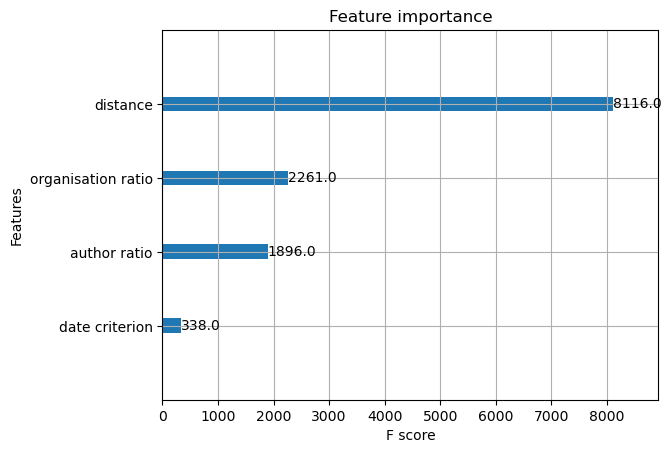

In [31]:
plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59941


[100]	test-logloss:0.01036
[200]	test-logloss:0.01040
[300]	test-logloss:0.01055
[400]	test-logloss:0.01065
[500]	test-logloss:0.01067
[600]	test-logloss:0.01103
[700]	test-logloss:0.01148
[800]	test-logloss:0.01181
[900]	test-logloss:0.01197
[1000]	test-logloss:0.01198
[1100]	test-logloss:0.01222
[1139]	test-logloss:0.01230
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.9933333333333333
0.99
0.9666666666666667
0.8466666666666667


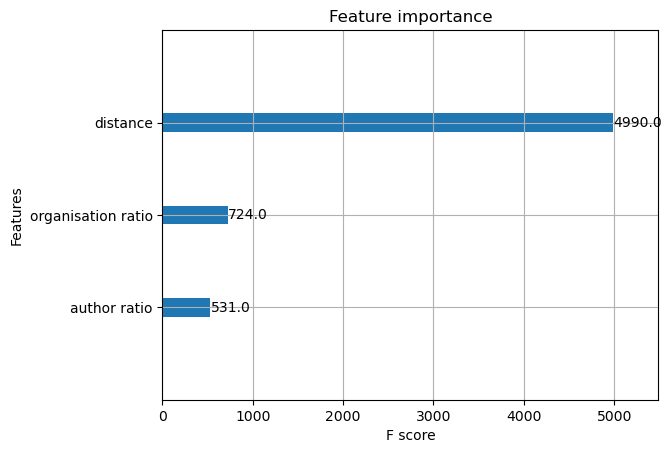

In [34]:
# drop date column
gb_data_no_date = np.delete(gb_data, 1, 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.60020
[100]	test-logloss:0.02647
[200]	test-logloss:0.02656
[300]	test-logloss:0.02703
[400]	test-logloss:0.02723
[500]	test-logloss:0.02756
[600]	test-logloss:0.02761
[700]	test-logloss:0.02775
[800]	test-logloss:0.02782
[900]	test-logloss:0.02800
[1000]	test-logloss:0.02810
[1100]	test-logloss:0.02817
[1110]	test-logloss:0.02818
0.5633333333333334
0.55
0.53
0.5033333333333333
0.45
0.4
0.37333333333333335
0.34
0.2966666666666667
0.20666666666666667


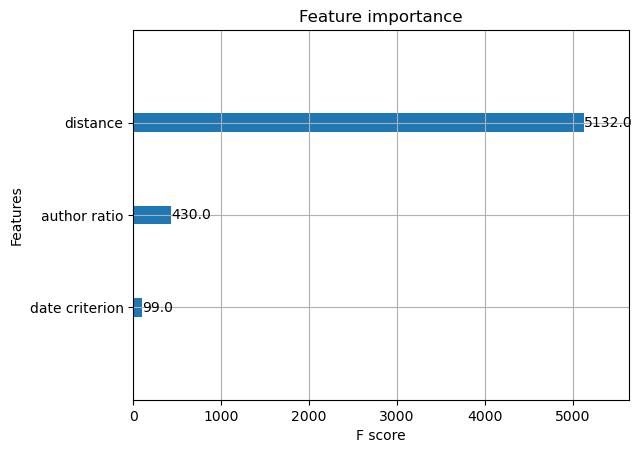

In [39]:
# no org
X = gb_data[:, [1, 3, 4]]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['date criterion', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59938
[100]	test-logloss:0.00977
[200]	test-logloss:0.00978
[300]	test-logloss:0.00982
[400]	test-logloss:0.01014
[500]	test-logloss:0.01043
[600]	test-logloss:0.01071
[700]	test-logloss:0.01090
[800]	test-logloss:0.01117
[900]	test-logloss:0.01145
[1000]	test-logloss:0.01167
[1100]	test-logloss:0.01187
[1143]	test-logloss:0.01191
0.99
0.99
0.99
0.99
0.9833333333333333
0.9833333333333333
0.9833333333333333
0.9733333333333334
0.9366666666666666
0.8033333333333333


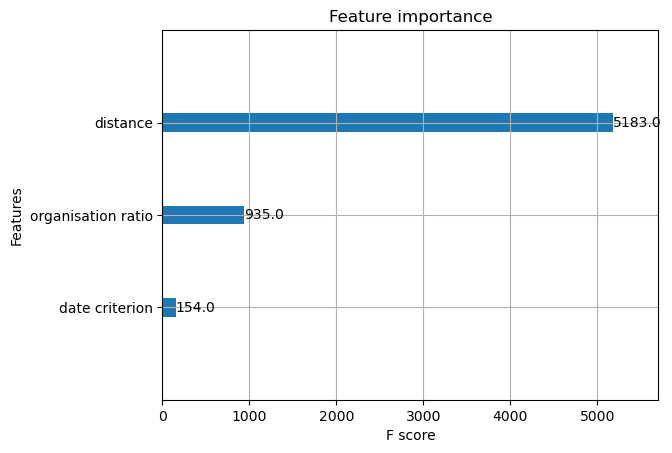

In [40]:
# no auth
X = gb_data[:, [1, 2, 4]]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['date criterion', 'organisation ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.60070
[100]	test-logloss:0.03175
[200]	test-logloss:0.03168
[300]	test-logloss:0.03180
[400]	test-logloss:0.03187
[500]	test-logloss:0.03196
[600]	test-logloss:0.03190
[700]	test-logloss:0.03200
[800]	test-logloss:0.03205
[900]	test-logloss:0.03210
[1000]	test-logloss:0.03212
[1100]	test-logloss:0.03220
[1129]	test-logloss:0.03224
0.5266666666666666
0.45666666666666667
0.3933333333333333
0.32666666666666666
0.30666666666666664
0.24
0.23
0.18666666666666668
0.13666666666666666
0.056666666666666664


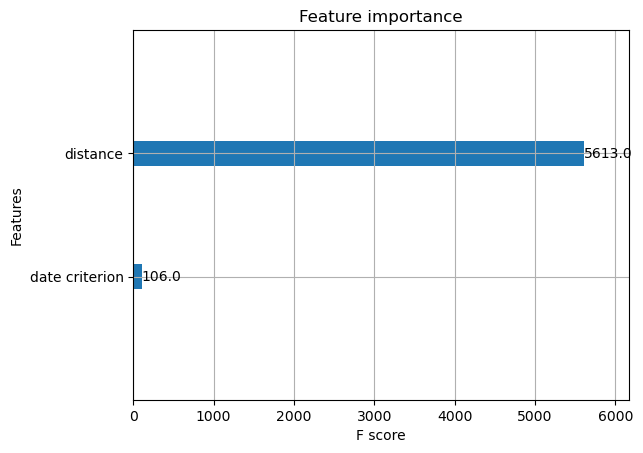

In [37]:
# no org and auth
X = gb_data[:, [1, 4]]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['date criterion', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59938
[100]	test-logloss:0.00984
[200]	test-logloss:0.00992
[300]	test-logloss:0.01007
[400]	test-logloss:0.01013
[500]	test-logloss:0.01046
[600]	test-logloss:0.01075
[700]	test-logloss:0.01093
[800]	test-logloss:0.01111
[900]	test-logloss:0.01126
[1000]	test-logloss:0.01140
[1100]	test-logloss:0.01181
[1117]	test-logloss:0.01187
0.99
0.99
0.99
0.99
0.9833333333333333
0.98
0.98
0.97
0.9266666666666666
0.8


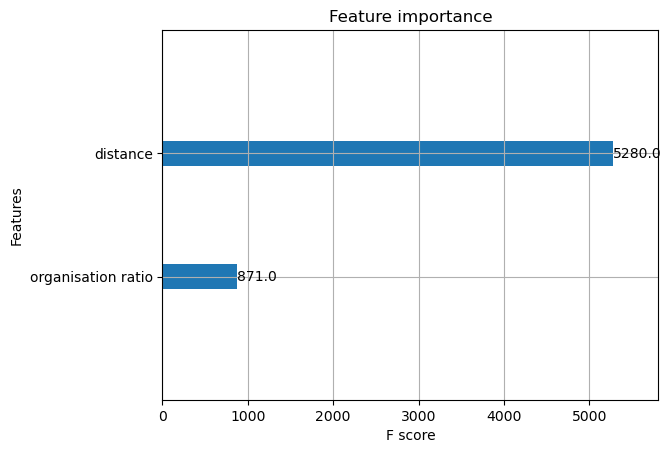

In [41]:
# only org and distance
X = gb_data[:, [2, 4]]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [33]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.18666666666666668
